<a href="https://colab.research.google.com/github/ziadalaa7/AI-Network-Threat-Detection/blob/main/AI_Powered_Network_Threat_Detection(_TILL_MILE_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🚨 AI-Powered Network Threat Detection

Github repository:https://github.com/ziadalaa7/AI-Network-Threat-Detection

## Problem formulation

With the rapid increase in cyberattacks, traditional rule-based intrusion detection systems struggle to adapt to evolving threats. There is a need for an intelligent system that can automatically detect anomalies in real-time network traffic and differentiate between normal and malicious activities. The formulated problem is:
How can we design a scalable, adaptive, and accurate AI-powered system to detect suspicious activities in network traffic?


## Problem Description

This project aims to develop a machine learning–driven solution for network threat detection. The system leverages advanced AI methods such as anomaly detection, Natural Language Processing (for log analysis), and classification algorithms to recognize malicious behaviors. It analyzes multiple network features including packet flow rates, inter-arrival times, TCP flags, and communication patterns to detect threats such as:
- Distributed Denial of Service (DDoS) attacks
- Port scanning
- Brute-force login attempts
- Data exfiltration

Unlike traditional signature-based systems, this solution learns from new data and continuously adapts to emerging threats.


## Objectives


- Provide real-time monitoring of network traffic.
- Detect cyber threats early, before escalation.
- Automate alerts to reduce the workload on security teams.
- Ensure scalability to handle large volumes of traffic.
- Enhance cybersecurity resilience through proactive and adaptive defense mechanisms.


## Load libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading data

In [2]:
data = pd.read_csv(r"/content/drive/MyDrive/depi grad project/full_data(final).zip")

In [3]:
data

Destination Port   Flow Duration   Total Fwd Packets  \
0                    54865               3                   2   
1                    55054             109                   1   
2                    55055              52                   1   
3                    46236              34                   1   
4                    54863               3                   2   
...                    ...             ...                 ...   
2830738                 53           32215                   4   
2830739                 53             324                   2   
2830740              58030              82                   2   
2830741                 53         1048635                   6   
2830742                 53           94939                   4   

          Total Backward Packets  Total Length of Fwd Packets  \
0                              0                           12   
1                              1                            6   
2                              1                            6   
3                              1                            6   
4                              0                           12   
...                          ...                          ...   
2830738                        2                          112   
2830739                        2                           84   
2830740                        1                           31   
2830741                        2                          192   
2830742                        2                          188   

          Total Length of Bwd Packets   Fwd Packet Length Max  \
0                                   0                       6   
1                                   6                       6   
2                                   6                       6   
3                                   6                       6   
4                                   0                       6   
...                               ...                     ...   
2830738                           152                      28   
2830739                           362                      42   
2830740                             6                      31   
2830741                           256                      32   
2830742                           226                      47   

          Fwd Packet Length Min   Fwd Packet Length Mean  \
0                             6                      6.0   
1                             6                      6.0   
2                             6                      6.0   
3                             6                      6.0   
4                             6                      6.0   
...                         ...                      ...   
2830738                      28                     28.0   
2830739                      42                     42.0   
2830740                       0                     15.5   
2830741                      32                     32.0   
2830742                      47                     47.0   

          Fwd Packet Length Std  ...   min_seg_size_forward  Active Mean  \
0                       0.00000  ...                     20          0.0   
1                       0.00000  ...                     20          0.0   
2                       0.00000  ...                     20          0.0   
3                       0.00000  ...                     20          0.0   
4                       0.00000  ...                     20          0.0   
...                         ...  ...                    ...          ...   
2830738                 0.00000  ...                     20          0.0   
2830739                 0.00000  ...                     20          0.0   
2830740                21.92031  ...                     32          0.0   
2830741                 0.00000  ...                     20          0.0   
2830742                 0.00000  ...                     20          0.0   

          Active Std 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

# DATA CLEANING

## check target destrbution

<Axes: xlabel='count', ylabel=' Label'>

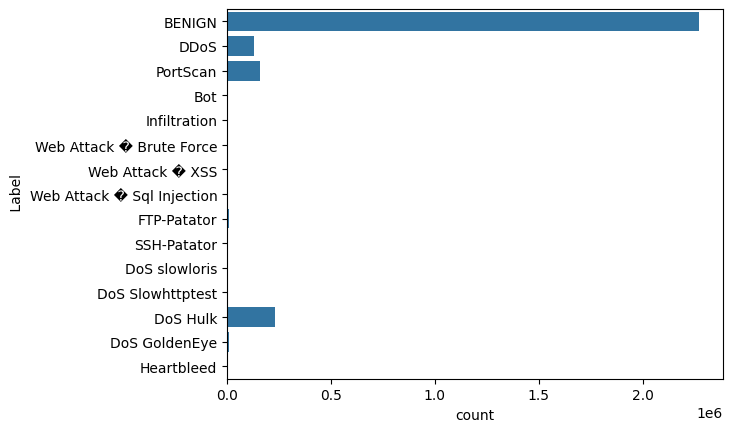

In [5]:
sns.countplot(data[' Label'])

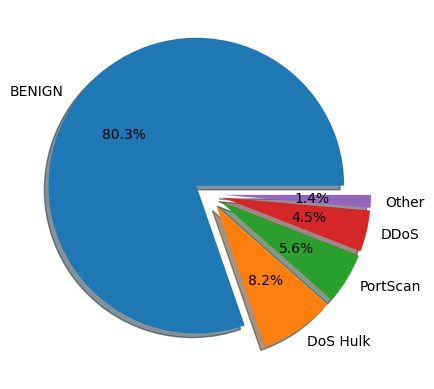

In [6]:
plt.Figure(figsize=(400,300))
label_counts = data[' Label'].value_counts()
# Combine labels with less than 1% into 'Other'
threshold = 0.01 * label_counts.sum()
main_labels = label_counts[label_counts >= threshold]
other_count = label_counts[label_counts < threshold].sum()

labels = list(main_labels.index)
sizes = list(main_labels.values)
explode = [0.1] * len(labels)

if other_count > 0:
    labels.append('Other')
    sizes.append(other_count)
    explode.append(0.1)
plt.pie(sizes, autopct='%1.1f%%', shadow=True, explode=explode, labels=labels)
plt.show()

 ## checking null values

In [7]:
data.isnull().sum()

Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64

In [8]:
data.isnull().sum().sum()

np.int64(1358)

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum().sum()

np.int64(0)

## checking duplicates

In [11]:
data.duplicated().sum()

np.int64(307376)

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated().sum()

np.int64(0)

## data descripe

In [14]:
data[' Destination Port']=data[' Destination Port'].astype('object')

In [15]:
data.describe()

Flow Duration   Total Fwd Packets   Total Backward Packets  \
count    2.522009e+06        2.522009e+06             2.522009e+06   
mean     1.658364e+07        1.027750e+01             1.156751e+01   
std      3.522618e+07        7.942294e+02             1.056668e+03   
min     -1.300000e+01        1.000000e+00             0.000000e+00   
25%      2.080000e+02        2.000000e+00             1.000000e+00   
50%      5.058700e+04        2.000000e+00             2.000000e+00   
75%      5.330376e+06        6.000000e+00             5.000000e+00   
max      1.200000e+08        2.197590e+05             2.919220e+05   

       Total Length of Fwd Packets   Total Length of Bwd Packets  \
count                 2.522009e+06                  2.522009e+06   
mean                  6.116607e+02                  1.813569e+04   
std                   1.058573e+04                  2.397602e+06   
min                   0.000000e+00                  0.000000e+00   
25%                   1.200000e+01                  6.000000e+00   
50%                   6.600000e+01                  1.560000e+02   
75%                   3.320000e+02                  9.910000e+02   
max                   1.290000e+07                  6.554530e+08   

        Fwd Packet Length Max   Fwd Packet Length Min  \
count            2.522009e+06            2.522009e+06   
mean             2.311241e+02            1.919733e+01   
std              7.562104e+02            6.079830e+01   
min              0.000000e+00            0.000000e+00   
25%              6.000000e+00            0.000000e+00   
50%              4.000000e+01            2.000000e+00   
75%              2.020000e+02            3.700000e+01   
max              2.482000e+04            2.325000e+03   

        Fwd Packet Length Mean   Fwd Packet Length Std  Bwd Packet Length Max  \
count             2.522009e+06            2.522009e+06           2.522009e+06   
mean              6.347899e+01            7.728840e+01           9.745064e+02   
std               1.955137e+02            2.968147e+02           2.037969e+03   
min               0.000000e+00            0.000000e+00           0.000000e+00   
25%               6.000000e+00            0.000000e+00           6.000000e+00   
50%               3.613084e+01            0.000000e+00           9.700000e+01   
75%               5.200000e+01            7.417179e+01           7.460000e+02   
max               5.940857e+03            7.125597e+03           1.953000e+04   

       ...   act_data_pkt_fwd   min_seg_size_forward   Active Mean  \
count  ...       2.522009e+06           2.522009e+06  2.522009e+06   
mean   ...       6.006745e+00          -3.080742e+03  9.153450e+04   
std    ...       6.742531e+02           1.149482e+06  6.864883e+05   
min    ...       0.000000e+00          -5.368707e+08  0.000000e+00   
25%    ...       0.000000e+00           2.000000e+01  0.000000e+00   
50%    ...       1.000000e+00           2.000000e+01  0.000000e+00   
75%    ...       3.000000e+00           3.200000e+01  0.000000e+00   
max    ...       2.135570e+05           1.380000e+02  1.100000e+08   

         Active Std    Active Max    Active Min     Idle Mean      Idle Std  \
count  2.522009e+06  2.522009e+06  2.522009e+06  2.522009e+06  2.522009e+06   
mean   4.616959e+04  1.719345e+05  6.543215e+04  9.332884e+06  5.655225e+05   
std    4.164856e+05  1.085317e+06  6.110134e+05  2.484306e+07  4.873014e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    7.420000e+07  1.100000e+08  1.100000e+08  1.200000e+08  7.690000e+07   

           Idle Max      Idle Min  
count  2.522009e+06  2.522009e+06  
mean   9.759082e+06  8.888401e+06  
std    2.561220e+07  2.457630e+07  
min    0.000000e+00  0.000000e+00

In [16]:
data[' Destination Port'].describe()

count     2522009
unique      53804
top            53
freq       876884
Name:  Destination Port, dtype: int64

## handling negative and infinite values

In [17]:
# Replace negatives with NaN
data['Flow Bytes/s'] = data['Flow Bytes/s'].mask(data['Flow Bytes/s'] < 0, np.nan)
data[' Flow Packets/s'] = data[' Flow Packets/s'].mask(data[' Flow Packets/s'] < 0, np.nan)
data[' Flow Duration'] = data[' Flow Duration'].mask(data[' Flow Duration'] < 0, np.nan)
data[' Flow IAT Mean'] = data[' Flow IAT Mean'].mask(data[' Flow IAT Mean'] < 0, np.nan)
data[' Flow IAT Max'] = data[' Flow IAT Max'].mask(data[' Flow IAT Max'] < 0, np.nan)
data[' Flow IAT Min'] = data[' Flow IAT Min'].mask(data[' Flow IAT Min'] < 0, np.nan)
data[' Fwd IAT Min'] = data[' Fwd IAT Min'].mask(data[' Fwd IAT Min'] < 0, np.nan)
data[' Fwd Header Length'] = data[' Fwd Header Length'].mask(data[' Fwd Header Length'] < 0, np.nan)
data[' Bwd Header Length'] = data[' Bwd Header Length'].mask(data[' Bwd Header Length'] < 0, np.nan)
data[' Fwd Header Length.1'] = data[' Fwd Header Length.1'].mask(data[' Fwd Header Length.1'] < 0, np.nan)
data[' min_seg_size_forward'] = data[' min_seg_size_forward'].mask(data[' min_seg_size_forward'] < 0, np.nan)
data['Init_Win_bytes_forward']=data['Init_Win_bytes_forward'].abs()
data[' Init_Win_bytes_backward']=data[' Init_Win_bytes_backward'].abs()



In [18]:
# Replace inf with NaN

data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [19]:
data.isnull().sum().sum()

np.int64(5952)

In [20]:
data.dropna(inplace=True)

In [21]:
data.describe()

Destination Port   Flow Duration   Total Fwd Packets  \
count       2.517883e+06    2.517883e+06        2.517883e+06   
mean        8.697186e+03    1.654502e+07        6.208108e+00   
std         1.901905e+04    3.518633e+07        7.875555e+01   
min         0.000000e+00    1.000000e+00        1.000000e+00   
25%         5.300000e+01    2.080000e+02        2.000000e+00   
50%         8.000000e+01    5.055500e+04        2.000000e+00   
75%         4.430000e+02    5.320670e+06        6.000000e+00   
max         6.553500e+04    1.200000e+08        1.121410e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.517883e+06                 2.517883e+06   
mean              6.134173e+00                 5.872497e+02   
std               1.090532e+02                 9.659165e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00                 6.600000e+01   
75%               5.000000e+00                 3.310000e+02   
max               1.573880e+05                 1.290000e+07   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  2.517883e+06            2.517883e+06   
mean                   5.994284e+03            2.306413e+02   
std                    2.653709e+05            7.555346e+02   
min                    0.000000e+00            0.000000e+00   
25%                    6.000000e+00            6.000000e+00   
50%                    1.550000e+02            4.000000e+01   
75%                    9.750000e+02            2.020000e+02   
max                    3.990000e+08            2.482000e+04   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
count            2.517883e+06             2.517883e+06   
mean             1.922429e+01             6.348070e+01   
std              6.082995e+01             1.954503e+02   
min              0.000000e+00             0.000000e+00   
25%              0.000000e+00             6.000000e+00   
50%              2.000000e+00             3.625000e+01   
75%              3.700000e+01             5.200000e+01   
max              2.325000e+03             5.940857e+03   

        Fwd Packet Length Std  ...   act_data_pkt_fwd   min_seg_size_forward  \
count            2.517883e+06  ...       2.517883e+06           2.517883e+06   
mean             7.722191e+01  ...       3.147459e+00           2.588707e+01   
std              2.967637e+02  ...       7.203449e+01           6.525290e+00   
min              0.000000e+00  ...       0.000000e+00           0.000000e+00   
25%              0.000000e+00  ...       0.000000e+00           2.000000e+01   
50%              0.000000e+00  ...       1.000000e+00           2.000000e+01   
75%              7.396114e+01  ...       3.000000e+00           3.200000e+01   
max              7.125597e+03  ...       1.082730e+05           1.380000e+02   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  2.517883e+06  2.517883e+06  2.517883e+06  2.517883e+06  2.517883e+06   
mean   9.037074e+04  4.566006e+04  1.699584e+05  6.455499e+04  9.326446e+06   
std    6.670639e+05  4.104564e+05  1.066590e+06  5.915220e+05  2.484369e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.100000e+08  7.420000e+07  1.100000e+08  1.100000e+08  1.200000e+08   

           Idle Std      Idle Max      Idle Min  
count  2.517883e+06  2.517883e+06  2.517883e+06  
mean   5.652944e+05  9.752471e+06  8.882299e+06  
std    4.873763e+06  2.561299e+07  2.457682e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.00

## Drop dummy columns

In [22]:
data.describe()

Destination Port   Flow Duration   Total Fwd Packets  \
count       2.517883e+06    2.517883e+06        2.517883e+06   
mean        8.697186e+03    1.654502e+07        6.208108e+00   
std         1.901905e+04    3.518633e+07        7.875555e+01   
min         0.000000e+00    1.000000e+00        1.000000e+00   
25%         5.300000e+01    2.080000e+02        2.000000e+00   
50%         8.000000e+01    5.055500e+04        2.000000e+00   
75%         4.430000e+02    5.320670e+06        6.000000e+00   
max         6.553500e+04    1.200000e+08        1.121410e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.517883e+06                 2.517883e+06   
mean              6.134173e+00                 5.872497e+02   
std               1.090532e+02                 9.659165e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00                 6.600000e+01   
75%               5.000000e+00                 3.310000e+02   
max               1.573880e+05                 1.290000e+07   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  2.517883e+06            2.517883e+06   
mean                   5.994284e+03            2.306413e+02   
std                    2.653709e+05            7.555346e+02   
min                    0.000000e+00            0.000000e+00   
25%                    6.000000e+00            6.000000e+00   
50%                    1.550000e+02            4.000000e+01   
75%                    9.750000e+02            2.020000e+02   
max                    3.990000e+08            2.482000e+04   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
count            2.517883e+06             2.517883e+06   
mean             1.922429e+01             6.348070e+01   
std              6.082995e+01             1.954503e+02   
min              0.000000e+00             0.000000e+00   
25%              0.000000e+00             6.000000e+00   
50%              2.000000e+00             3.625000e+01   
75%              3.700000e+01             5.200000e+01   
max              2.325000e+03             5.940857e+03   

        Fwd Packet Length Std  ...   act_data_pkt_fwd   min_seg_size_forward  \
count            2.517883e+06  ...       2.517883e+06           2.517883e+06   
mean             7.722191e+01  ...       3.147459e+00           2.588707e+01   
std              2.967637e+02  ...       7.203449e+01           6.525290e+00   
min              0.000000e+00  ...       0.000000e+00           0.000000e+00   
25%              0.000000e+00  ...       0.000000e+00           2.000000e+01   
50%              0.000000e+00  ...       1.000000e+00           2.000000e+01   
75%              7.396114e+01  ...       3.000000e+00           3.200000e+01   
max              7.125597e+03  ...       1.082730e+05           1.380000e+02   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  2.517883e+06  2.517883e+06  2.517883e+06  2.517883e+06  2.517883e+06   
mean   9.037074e+04  4.566006e+04  1.699584e+05  6.455499e+04  9.326446e+06   
std    6.670639e+05  4.104564e+05  1.066590e+06  5.915220e+05  2.484369e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.100000e+08  7.420000e+07  1.100000e+08  1.100000e+08  1.200000e+08   

           Idle Std      Idle Max      Idle Min  
count  2.517883e+06  2.517883e+06  2.517883e+06  
mean   5.652944e+05  9.752471e+06  8.882299e+06  
std    4.873763e+06  2.561299e+07  2.457682e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.00

In [23]:
# Find columns that contain only one unique value
dummy_value_cols = [col for col in data.columns if data[col].nunique() == 1]

# Display them
print("Columns with only one unique value:")
print(dummy_value_cols)

Columns with only one unique value:
[' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [24]:
data.drop(dummy_value_cols, axis=1, inplace=True)


In [25]:
## duplicated columns
data.drop([' Fwd Header Length.1'],axis=1,inplace=True)

In [26]:
data

Destination Port   Flow Duration   Total Fwd Packets  \
0                    54865             3.0                   2   
1                    55054           109.0                   1   
2                    55055            52.0                   1   
3                    46236            34.0                   1   
4                    54863             3.0                   2   
...                    ...             ...                 ...   
2830738                 53         32215.0                   4   
2830739                 53           324.0                   2   
2830740              58030            82.0                   2   
2830741                 53       1048635.0                   6   
2830742                 53         94939.0                   4   

          Total Backward Packets  Total Length of Fwd Packets  \
0                              0                           12   
1                              1                            6   
2                              1                            6   
3                              1                            6   
4                              0                           12   
...                          ...                          ...   
2830738                        2                          112   
2830739                        2                           84   
2830740                        1                           31   
2830741                        2                          192   
2830742                        2                          188   

          Total Length of Bwd Packets   Fwd Packet Length Max  \
0                                   0                       6   
1                                   6                       6   
2                                   6                       6   
3                                   6                       6   
4                                   0                       6   
...                               ...                     ...   
2830738                           152                      28   
2830739                           362                      42   
2830740                             6                      31   
2830741                           256                      32   
2830742                           226                      47   

          Fwd Packet Length Min   Fwd Packet Length Mean  \
0                             6                      6.0   
1                             6                      6.0   
2                             6                      6.0   
3                             6                      6.0   
4                             6                      6.0   
...                         ...                      ...   
2830738                      28                     28.0   
2830739                      42                     42.0   
2830740                       0                     15.5   
2830741                      32                     32.0   
2830742                      47                     47.0   

          Fwd Packet Length Std  ...   min_seg_size_forward  Active Mean  \
0                       0.00000  ...                   20.0          0.0   
1                       0.00000  ...                   20.0          0.0   
2                       0.00000  ...                   20.0          0.0   
3                       0.00000  ...                   20.0          0.0   
4                       0.00000  ...                   20.0          0.0   
...                         ...  ...                    ...          ...   
2830738                 0.00000  ...                   20.0          0.0   
2830739                 0.00000  ...                   20.0          0.0   
2830740                21.92031  ...                   32.0          0.0   
2830741                 0.00000  ...                   20.0          0.0   
2830742                 0.00000  ...                   20.0          0.0   

          Active Std 

## checking outliers

we shouldnt remove outliers here as in our working domain the outliers actually represents the attacks as the attackers do abnormal behaviour to attack our system

## removing redundant columns based on correlation

In [27]:
data.describe()

Destination Port   Flow Duration   Total Fwd Packets  \
count       2.517883e+06    2.517883e+06        2.517883e+06   
mean        8.697186e+03    1.654502e+07        6.208108e+00   
std         1.901905e+04    3.518633e+07        7.875555e+01   
min         0.000000e+00    1.000000e+00        1.000000e+00   
25%         5.300000e+01    2.080000e+02        2.000000e+00   
50%         8.000000e+01    5.055500e+04        2.000000e+00   
75%         4.430000e+02    5.320670e+06        6.000000e+00   
max         6.553500e+04    1.200000e+08        1.121410e+05   

        Total Backward Packets  Total Length of Fwd Packets  \
count             2.517883e+06                 2.517883e+06   
mean              6.134173e+00                 5.872497e+02   
std               1.090532e+02                 9.659165e+03   
min               0.000000e+00                 0.000000e+00   
25%               1.000000e+00                 1.200000e+01   
50%               2.000000e+00                 6.600000e+01   
75%               5.000000e+00                 3.310000e+02   
max               1.573880e+05                 1.290000e+07   

        Total Length of Bwd Packets   Fwd Packet Length Max  \
count                  2.517883e+06            2.517883e+06   
mean                   5.994284e+03            2.306413e+02   
std                    2.653709e+05            7.555346e+02   
min                    0.000000e+00            0.000000e+00   
25%                    6.000000e+00            6.000000e+00   
50%                    1.550000e+02            4.000000e+01   
75%                    9.750000e+02            2.020000e+02   
max                    3.990000e+08            2.482000e+04   

        Fwd Packet Length Min   Fwd Packet Length Mean  \
count            2.517883e+06             2.517883e+06   
mean             1.922429e+01             6.348070e+01   
std              6.082995e+01             1.954503e+02   
min              0.000000e+00             0.000000e+00   
25%              0.000000e+00             6.000000e+00   
50%              2.000000e+00             3.625000e+01   
75%              3.700000e+01             5.200000e+01   
max              2.325000e+03             5.940857e+03   

        Fwd Packet Length Std  ...   act_data_pkt_fwd   min_seg_size_forward  \
count            2.517883e+06  ...       2.517883e+06           2.517883e+06   
mean             7.722191e+01  ...       3.147459e+00           2.588707e+01   
std              2.967637e+02  ...       7.203449e+01           6.525290e+00   
min              0.000000e+00  ...       0.000000e+00           0.000000e+00   
25%              0.000000e+00  ...       0.000000e+00           2.000000e+01   
50%              0.000000e+00  ...       1.000000e+00           2.000000e+01   
75%              7.396114e+01  ...       3.000000e+00           3.200000e+01   
max              7.125597e+03  ...       1.082730e+05           1.380000e+02   

        Active Mean    Active Std    Active Max    Active Min     Idle Mean  \
count  2.517883e+06  2.517883e+06  2.517883e+06  2.517883e+06  2.517883e+06   
mean   9.037074e+04  4.566006e+04  1.699584e+05  6.455499e+04  9.326446e+06   
std    6.670639e+05  4.104564e+05  1.066590e+06  5.915220e+05  2.484369e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    1.100000e+08  7.420000e+07  1.100000e+08  1.100000e+08  1.200000e+08   

           Idle Std      Idle Max      Idle Min  
count  2.517883e+06  2.517883e+06  2.517883e+06  
mean   5.652944e+05  9.752471e+06  8.882299e+06  
std    4.873763e+06  2.561299e+07  2.457682e+07  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  0.00

In [28]:
data[' Destination Port']=data[' Destination Port'].astype('object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517883 entries, 0 to 2830742
Data columns (total 70 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             object 
 1    Flow Duration                float64
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max              

In [30]:
data

Destination Port   Flow Duration   Total Fwd Packets  \
0                   54865             3.0                   2   
1                   55054           109.0                   1   
2                   55055            52.0                   1   
3                   46236            34.0                   1   
4                   54863             3.0                   2   
...                   ...             ...                 ...   
2830738                53         32215.0                   4   
2830739                53           324.0                   2   
2830740             58030            82.0                   2   
2830741                53       1048635.0                   6   
2830742                53         94939.0                   4   

          Total Backward Packets  Total Length of Fwd Packets  \
0                              0                           12   
1                              1                            6   
2                              1                            6   
3                              1                            6   
4                              0                           12   
...                          ...                          ...   
2830738                        2                          112   
2830739                        2                           84   
2830740                        1                           31   
2830741                        2                          192   
2830742                        2                          188   

          Total Length of Bwd Packets   Fwd Packet Length Max  \
0                                   0                       6   
1                                   6                       6   
2                                   6                       6   
3                                   6                       6   
4                                   0                       6   
...                               ...                     ...   
2830738                           152                      28   
2830739                           362                      42   
2830740                             6                      31   
2830741                           256                      32   
2830742                           226                      47   

          Fwd Packet Length Min   Fwd Packet Length Mean  \
0                             6                      6.0   
1                             6                      6.0   
2                             6                      6.0   
3                             6                      6.0   
4                             6                      6.0   
...                         ...                      ...   
2830738                      28                     28.0   
2830739                      42                     42.0   
2830740                       0                     15.5   
2830741                      32                     32.0   
2830742                      47                     47.0   

          Fwd Packet Length Std  ...   min_seg_size_forward  Active Mean  \
0                       0.00000  ...                   20.0          0.0   
1                       0.00000  ...                   20.0          0.0   
2                       0.00000  ...                   20.0          0.0   
3                       0.00000  ...                   20.0          0.0   
4                       0.00000  ...                   20.0          0.0   
...                         ...  ...                    ...          ...   
2830738                 0.00000  ...                   20.0          0.0   
2830739                 0.00000  ...                   20.0          0.0   
2830740                21.92031  ...                   32.0          0.0   
2830741                 0.00000  ...                   20.0          0.0   
2830742                 0.00000  ...                   20.0          0.0   

          Active Std   Active Ma

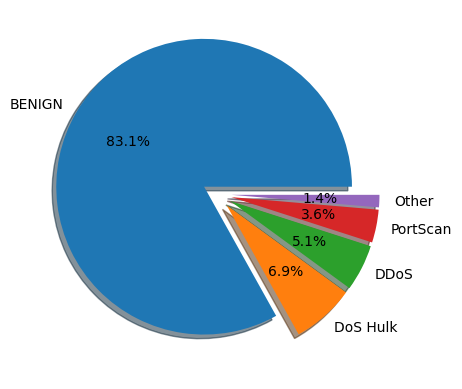

In [31]:
plt.Figure(figsize=(400,300))
label_counts = data[' Label'].value_counts()
# Combine labels with less than 1% into 'Other'
threshold = 0.01 * label_counts.sum()
main_labels = label_counts[label_counts >= threshold]
other_count = label_counts[label_counts < threshold].sum()

labels = list(main_labels.index)
sizes = list(main_labels.values)
explode = [0.1] * len(labels)

if other_count > 0:
    labels.append('Other')
    sizes.append(other_count)
    explode.append(0.1)
plt.pie(sizes, autopct='%1.1f%%', shadow=True, explode=explode, labels=labels)
plt.show()

In [32]:
corr_data=data.drop(columns=[' Label'])

In [33]:
corr_data.corr()

Destination Port   Flow Duration  \
 Destination Port                     1.000000       -0.171384   
 Flow Duration                       -0.171384        1.000000   
 Total Fwd Packets                   -0.023573        0.076944   
 Total Backward Packets              -0.019707        0.061297   
Total Length of Fwd Packets           0.011709        0.063463   
...                                        ...             ...   
 Active Min                          -0.027379        0.118799   
Idle Mean                            -0.127732        0.764803   
 Idle Std                             0.006870        0.240664   
 Idle Max                            -0.123408        0.776447   
 Idle Min                            -0.129303        0.734778   

                              Total Fwd Packets   Total Backward Packets  \
 Destination Port                     -0.023573                -0.019707   
 Flow Duration                         0.076944                 0.061297   
 Total Fwd Packets                     1.000000                 0.991594   
 Total Backward Packets                0.991594                 1.000000   
Total Length of Fwd Packets            0.162655                 0.111187   
...                                         ...                      ...   
 Active Min                            0.044521                 0.040020   
Idle Mean                              0.024730                 0.019961   
 Idle Std                              0.011483                 0.007873   
 Idle Max                              0.025898                 0.020529   
 Idle Min                              0.022754                 0.018607   

                             Total Length of Fwd Packets  \
 Destination Port                               0.011709   
 Flow Duration                                  0.063463   
 Total Fwd Packets                              0.162655   
 Total Backward Packets                         0.111187   
Total Length of Fwd Packets                     1.000000   
...                                                  ...   
 Active Min                                     0.061548   
Idle Mean                                       0.022802   
 Idle Std                                       0.029047   
 Idle Max                                       0.026556   
 Idle Min                                       0.018421   

                              Total Length of Bwd Packets  \
 Destination Port                               -0.009946   
 Flow Duration                                   0.030031   
 Total Fwd Packets                               0.980786   
 Total Backward Packets                          0.989786   
Total Length of Fwd Packets                      0.054473   
...                                                   ...   
 Active Min                                      0.021908   
Idle Mean                                        0.013979   
 Idle Std                                        0.004251   
 Idle Max                                        0.014156   
 Idle Min                                        0.013354   

                              Fwd Packet Length Max   Fwd Packet Length Min  \
 Destination Port                          0.091597               -0.047161   
 Flow Duration                             0.263182               -0.115637   
 Total Fwd Packets                         0.039949               -0.016573   
 Total Backward Packets                    0.034525               -0.011779   
Total Length of Fwd Packets                0.211344               -0.001127   
...                                             ...                     ...   
 Active Min                                0.104477               -0.028678   
Idle Mean                                  0.171771               -0.078516   
 Idle Std                                  0.175733               -0.032461   
 Idle Max                                  0.190337               -0.080821   
 

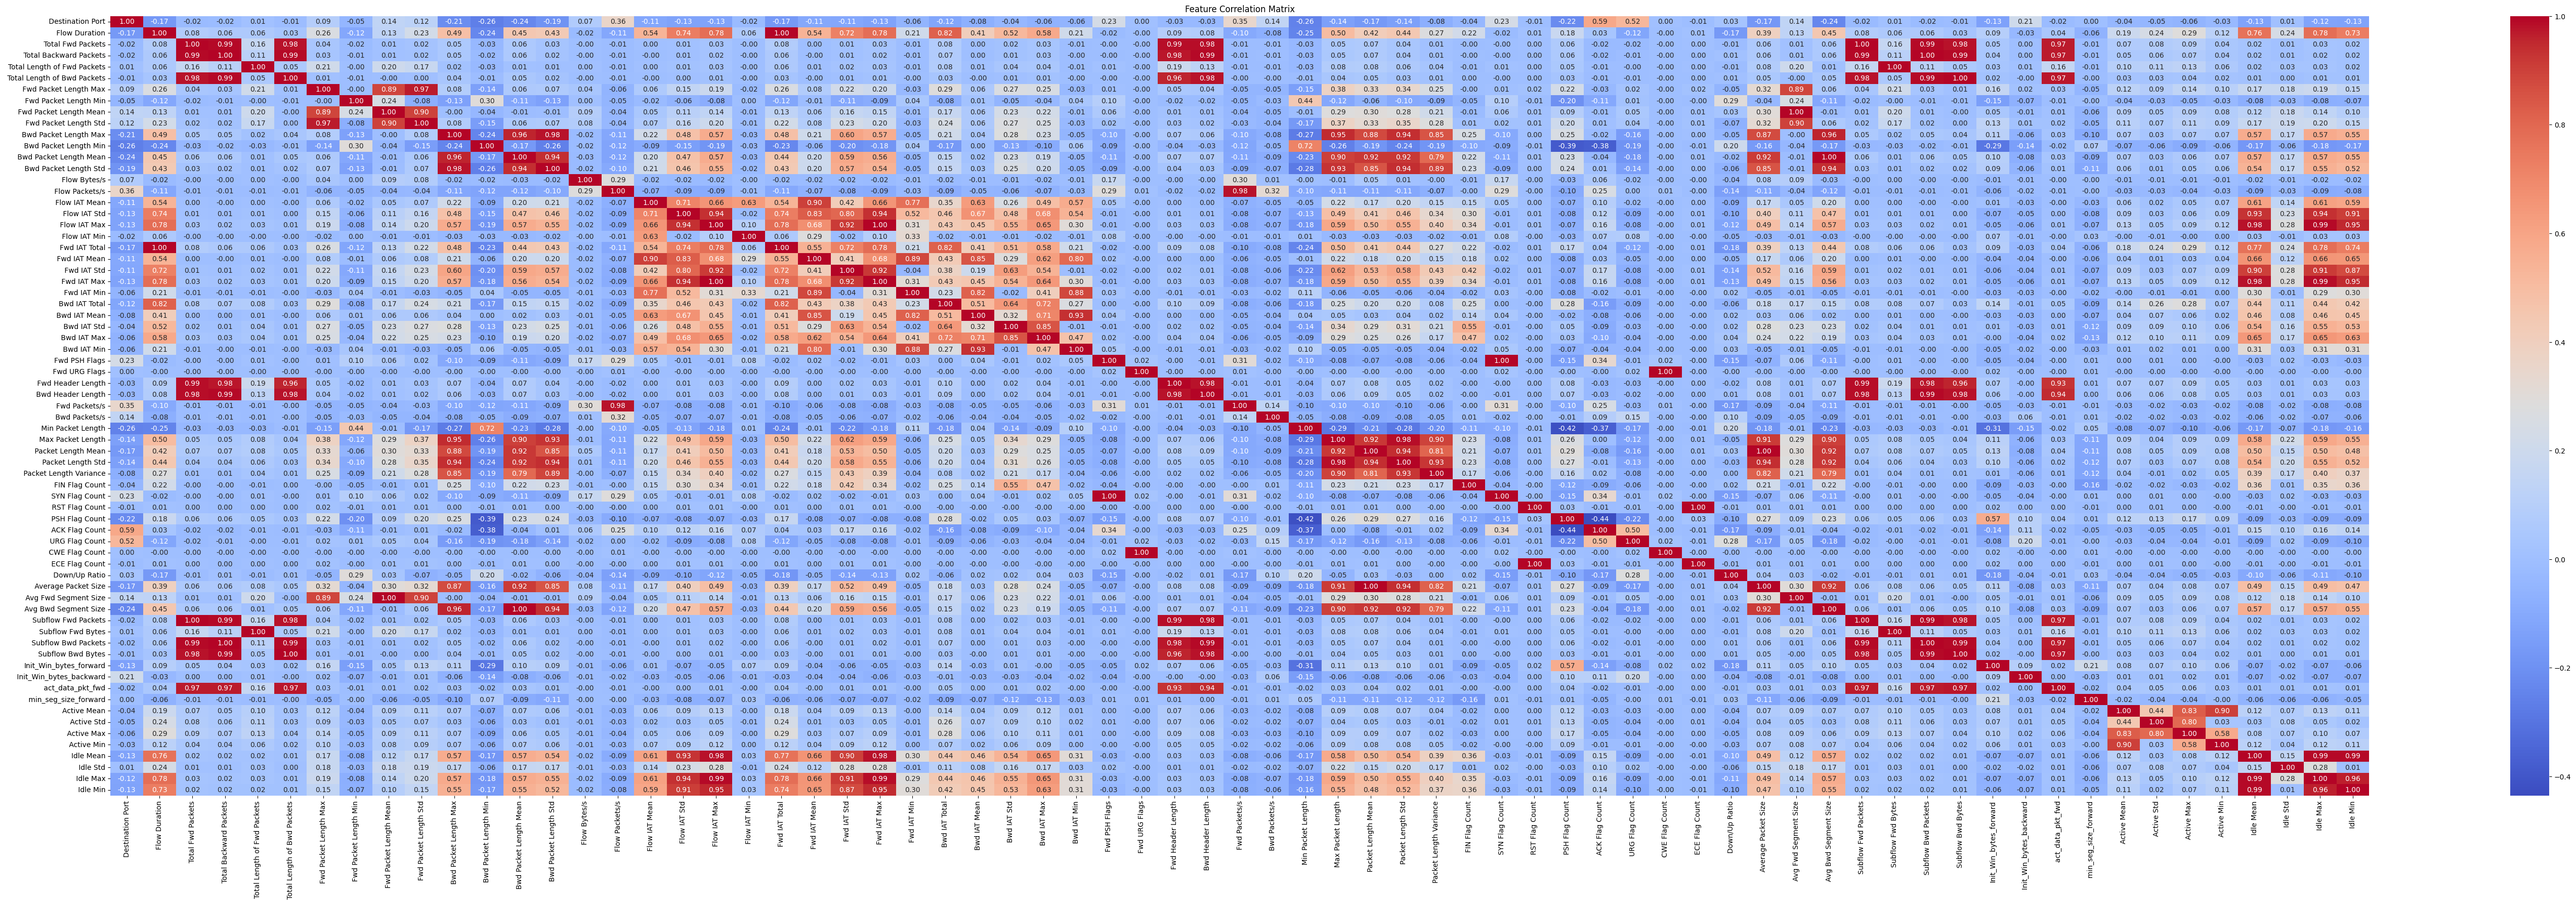

In [34]:
#features correlatio  # or whatever your target column name is
plt.figure(figsize=(72,20))
correlation_matrix = corr_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

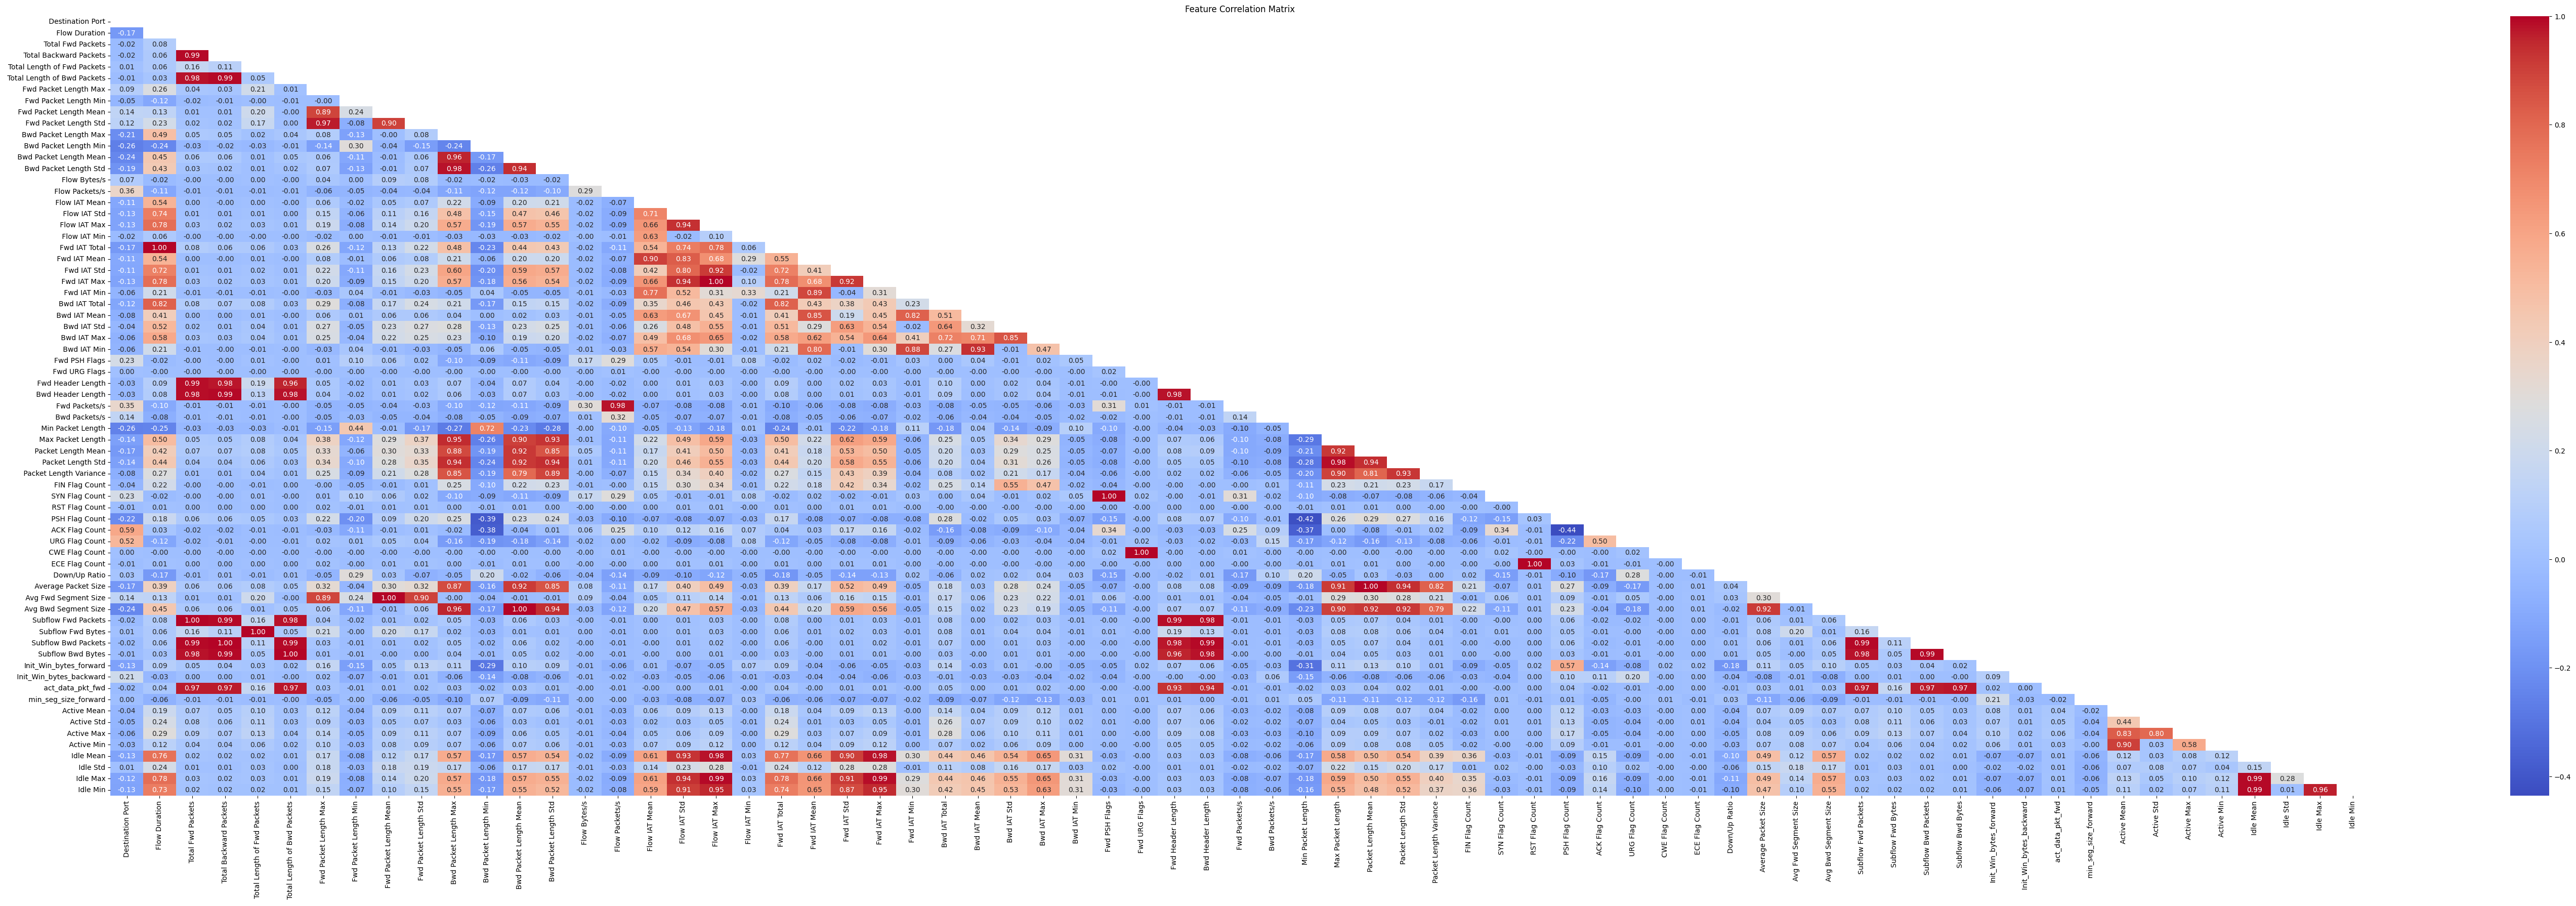

In [35]:
#features correlatio  # or whatever your target column name is
plt.figure(figsize=(72,20))
correlation_matrix = corr_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm',mask=mask)
plt.title("Feature Correlation Matrix")
plt.show()

In [36]:
import pandas as pd
import numpy as np

# Compute correlation matrix (absolute values)
corr_matrix = corr_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

print("Highly correlated features to drop:")
print(to_drop)


Highly correlated features to drop:
[' Total Backward Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Std', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', ' Flow IAT Max', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Bwd IAT Min', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', ' SYN Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Average Packet Size', ' Avg Fwd Segment Size', ' Avg Bwd Segment Size', 'Subflow Fwd Packets', ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes', ' act_data_pkt_fwd', ' Active Min', 'Idle Mean', ' Idle Max', ' Idle Min']


In [37]:
c=0
for col in to_drop:
    print(col)
    c+=1
print("Total columns to drop:", c)

 Total Backward Packets
 Total Length of Bwd Packets
 Fwd Packet Length Std
 Bwd Packet Length Mean
 Bwd Packet Length Std
 Flow IAT Max
Fwd IAT Total
 Fwd IAT Mean
 Fwd IAT Std
 Fwd IAT Max
 Bwd IAT Min
 Fwd Header Length
 Bwd Header Length
Fwd Packets/s
 Max Packet Length
 Packet Length Mean
 Packet Length Std
 Packet Length Variance
 SYN Flag Count
 CWE Flag Count
 ECE Flag Count
 Average Packet Size
 Avg Fwd Segment Size
 Avg Bwd Segment Size
Subflow Fwd Packets
 Subflow Fwd Bytes
 Subflow Bwd Packets
 Subflow Bwd Bytes
 act_data_pkt_fwd
 Active Min
Idle Mean
 Idle Max
 Idle Min
Total columns to drop: 33


In [38]:
data.drop(columns=to_drop, inplace=True)

In [39]:
data

Destination Port   Flow Duration   Total Fwd Packets  \
0                   54865             3.0                   2   
1                   55054           109.0                   1   
2                   55055            52.0                   1   
3                   46236            34.0                   1   
4                   54863             3.0                   2   
...                   ...             ...                 ...   
2830738                53         32215.0                   4   
2830739                53           324.0                   2   
2830740             58030            82.0                   2   
2830741                53       1048635.0                   6   
2830742                53         94939.0                   4   

         Total Length of Fwd Packets   Fwd Packet Length Max  \
0                                 12                       6   
1                                  6                       6   
2                                  6                       6   
3                                  6                       6   
4                                 12                       6   
...                              ...                     ...   
2830738                          112                      28   
2830739                           84                      42   
2830740                           31                      31   
2830741                          192                      32   
2830742                          188                      47   

          Fwd Packet Length Min   Fwd Packet Length Mean  \
0                             6                      6.0   
1                             6                      6.0   
2                             6                      6.0   
3                             6                      6.0   
4                             6                      6.0   
...                         ...                      ...   
2830738                      28                     28.0   
2830739                      42                     42.0   
2830740                       0                     15.5   
2830741                      32                     32.0   
2830742                      47                     47.0   

         Bwd Packet Length Max   Bwd Packet Length Min  Flow Bytes/s  ...  \
0                            0                       0  4.000000e+06  ...   
1                            6                       6  1.100917e+05  ...   
2                            6                       6  2.307692e+05  ...   
3                            6                       6  3.529412e+05  ...   
4                            0                       0  4.000000e+06  ...   
...                        ...                     ...           ...  ...   
2830738                     76                      76  8.194940e+03  ...   
2830739                    181                     181  1.376543e+06  ...   
2830740                      6                       6  4.512195e+05  ...   
2830741                    128                     128  4.272221e+02  ...   
2830742                    113                     113  4.360695e+03  ...   

          URG Flag Count   Down/Up Ratio  Init_Win_bytes_forward  \
0                      0               0                      33   
1                      1               1                      29   
2                      1               1                      29   
3                      1               1                      31   
4                      0               0                      32   
...                  ...             ...                     ...   
2830738                0               0                       1   
2830739                0               1                       1   
2830740                0               0                    1006   
2830741                0               0                       1   
2830742                0               0                       1 

In [40]:
data

Destination Port   Flow Duration   Total Fwd Packets  \
0                   54865             3.0                   2   
1                   55054           109.0                   1   
2                   55055            52.0                   1   
3                   46236            34.0                   1   
4                   54863             3.0                   2   
...                   ...             ...                 ...   
2830738                53         32215.0                   4   
2830739                53           324.0                   2   
2830740             58030            82.0                   2   
2830741                53       1048635.0                   6   
2830742                53         94939.0                   4   

         Total Length of Fwd Packets   Fwd Packet Length Max  \
0                                 12                       6   
1                                  6                       6   
2                                  6                       6   
3                                  6                       6   
4                                 12                       6   
...                              ...                     ...   
2830738                          112                      28   
2830739                           84                      42   
2830740                           31                      31   
2830741                          192                      32   
2830742                          188                      47   

          Fwd Packet Length Min   Fwd Packet Length Mean  \
0                             6                      6.0   
1                             6                      6.0   
2                             6                      6.0   
3                             6                      6.0   
4                             6                      6.0   
...                         ...                      ...   
2830738                      28                     28.0   
2830739                      42                     42.0   
2830740                       0                     15.5   
2830741                      32                     32.0   
2830742                      47                     47.0   

         Bwd Packet Length Max   Bwd Packet Length Min  Flow Bytes/s  ...  \
0                            0                       0  4.000000e+06  ...   
1                            6                       6  1.100917e+05  ...   
2                            6                       6  2.307692e+05  ...   
3                            6                       6  3.529412e+05  ...   
4                            0                       0  4.000000e+06  ...   
...                        ...                     ...           ...  ...   
2830738                     76                      76  8.194940e+03  ...   
2830739                    181                     181  1.376543e+06  ...   
2830740                      6                       6  4.512195e+05  ...   
2830741                    128                     128  4.272221e+02  ...   
2830742                    113                     113  4.360695e+03  ...   

          URG Flag Count   Down/Up Ratio  Init_Win_bytes_forward  \
0                      0               0                      33   
1                      1               1                      29   
2                      1               1                      29   
3                      1               1                      31   
4                      0               0                      32   
...                  ...             ...                     ...   
2830738                0               0                       1   
2830739                0               1                       1   
2830740                0               0                    1006   
2830741                0               0                       1   
2830742                0               0                       1 

## GROUP TARGET VALUES UNDER MORE GENERAL TARGETS

In [41]:
data[' Label'].unique()

array(['BENIGN', 'DDoS', 'PortScan', 'Bot', 'Infiltration',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'FTP-Patator', 'SSH-Patator',
       'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye',
       'Heartbleed'], dtype=object)

In [42]:
## grouping attack types into main categories
data[' Label'] = data[' Label'].replace({
    'BENIGN': 'BENIGN',
    'Heartbleed': 'DoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'DDoS': 'DoS',
    'PortScan': 'PortScan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Infiltration': 'Infiltration',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
})

In [43]:
data[' Label'].nunique()

7

In [44]:
data[' Label'].unique()

array(['BENIGN', 'DoS', 'PortScan', 'Bot', 'Infiltration', 'Web Attack',
       'Brute Force'], dtype=object)

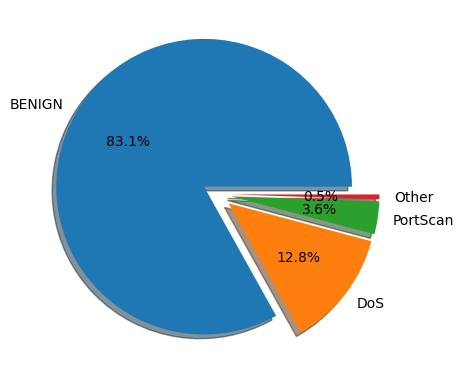

In [45]:
plt.Figure(figsize=(400,300))
label_counts = data[' Label'].value_counts()
# Combine labels with less than 1% into 'Other'
threshold = 0.01 * label_counts.sum()
main_labels = label_counts[label_counts >= threshold]
other_count = label_counts[label_counts < threshold].sum()

labels = list(main_labels.index)
sizes = list(main_labels.values)
explode = [0.1] * len(labels)

if other_count > 0:
    labels.append('Other')
    sizes.append(other_count)
    explode.append(0.1)
plt.pie(sizes, autopct='%1.1f%%', shadow=True, explode=explode, labels=labels)
plt.show()

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517883 entries, 0 to 2830742
Data columns (total 37 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0    Destination Port            object 
 1    Flow Duration               float64
 2    Total Fwd Packets           int64  
 3   Total Length of Fwd Packets  int64  
 4    Fwd Packet Length Max       int64  
 5    Fwd Packet Length Min       int64  
 6    Fwd Packet Length Mean      float64
 7   Bwd Packet Length Max        int64  
 8    Bwd Packet Length Min       int64  
 9   Flow Bytes/s                 float64
 10   Flow Packets/s              float64
 11   Flow IAT Mean               float64
 12   Flow IAT Std                float64
 13   Flow IAT Min                float64
 14   Fwd IAT Min                 float64
 15  Bwd IAT Total                int64  
 16   Bwd IAT Mean                float64
 17   Bwd IAT Std                 float64
 18   Bwd IAT Max                 int64  
 19  Fwd P

## CHANGE DATA TYPES TO REDUCE MEMORY USAGE

In [47]:
## change data types to lower ram consumption int64->int32 , float64->float32
for col in data.columns:
    if data[col].dtype == 'int64':
        data[col] = data[col].astype('int32')
    elif data[col].dtype == 'float64':
        data[col] = data[col].astype('float32')


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517883 entries, 0 to 2830742
Data columns (total 37 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0    Destination Port            object 
 1    Flow Duration               float32
 2    Total Fwd Packets           int32  
 3   Total Length of Fwd Packets  int32  
 4    Fwd Packet Length Max       int32  
 5    Fwd Packet Length Min       int32  
 6    Fwd Packet Length Mean      float32
 7   Bwd Packet Length Max        int32  
 8    Bwd Packet Length Min       int32  
 9   Flow Bytes/s                 float32
 10   Flow Packets/s              float32
 11   Flow IAT Mean               float32
 12   Flow IAT Std                float32
 13   Flow IAT Min                float32
 14   Fwd IAT Min                 float32
 15  Bwd IAT Total                int32  
 16   Bwd IAT Mean                float32
 17   Bwd IAT Std                 float32
 18   Bwd IAT Max                 int32  
 19  Fwd P

<Axes: xlabel='count', ylabel=' Label'>

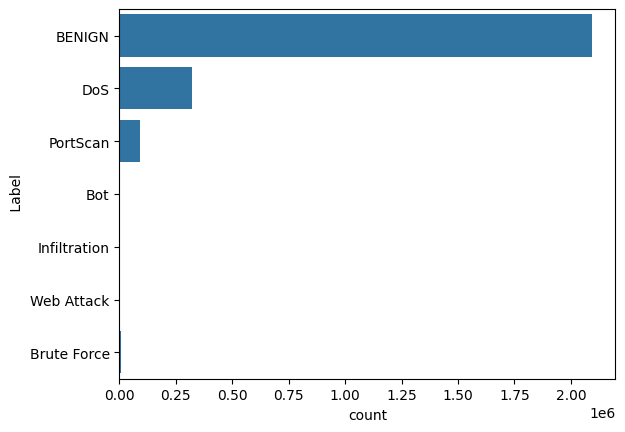

In [49]:
sns.countplot(data[' Label'])

# EDA & VISUALIZATIONS

## check target distrbution

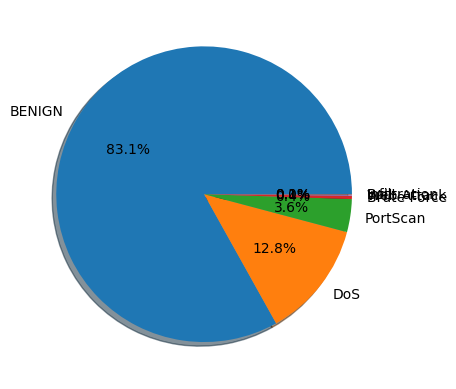

In [50]:
plt.Figure(figsize=(1920,1080))
plt.pie(data[' Label'].value_counts(), labels=data[' Label'].value_counts().index,autopct='%1.1f%%',shadow=True);

plt.show()

<Axes: xlabel='count', ylabel=' Label'>

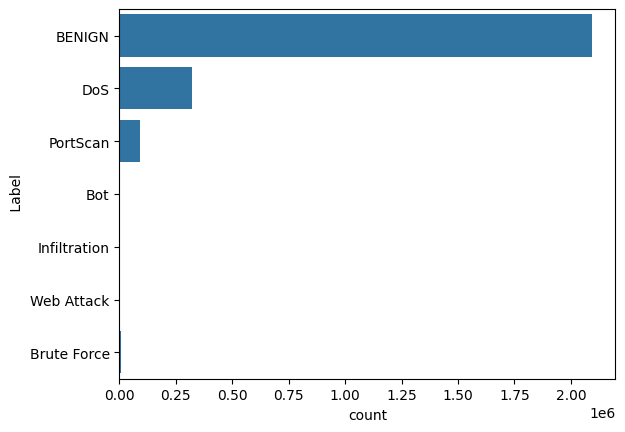

In [51]:
sns.countplot(data[' Label'])

In [92]:
## check nunique of each column
for col in data.columns:
    print("column name:",col,"column unique values:",data[col].nunique(),"column data types:",data[col].dtype)
    print("----------------------------------------------------------------------------------------------------------------")

column name:  Destination Port column unique values: 53787 column data types: object
----------------------------------------------------------------------------------------------------------------
column name:  Flow Duration column unique values: 1009853 column data types: float32
----------------------------------------------------------------------------------------------------------------
column name:  Total Fwd Packets column unique values: 1100 column data types: int32
----------------------------------------------------------------------------------------------------------------
column name: Total Length of Fwd Packets column unique values: 17555 column data types: int32
----------------------------------------------------------------------------------------------------------------
column name:  Fwd Packet Length Max column unique values: 5263 column data types: int32
----------------------------------------------------------------------------------------------------------------

In [53]:
data[' ACK Flag Count'].dtype

dtype('int32')

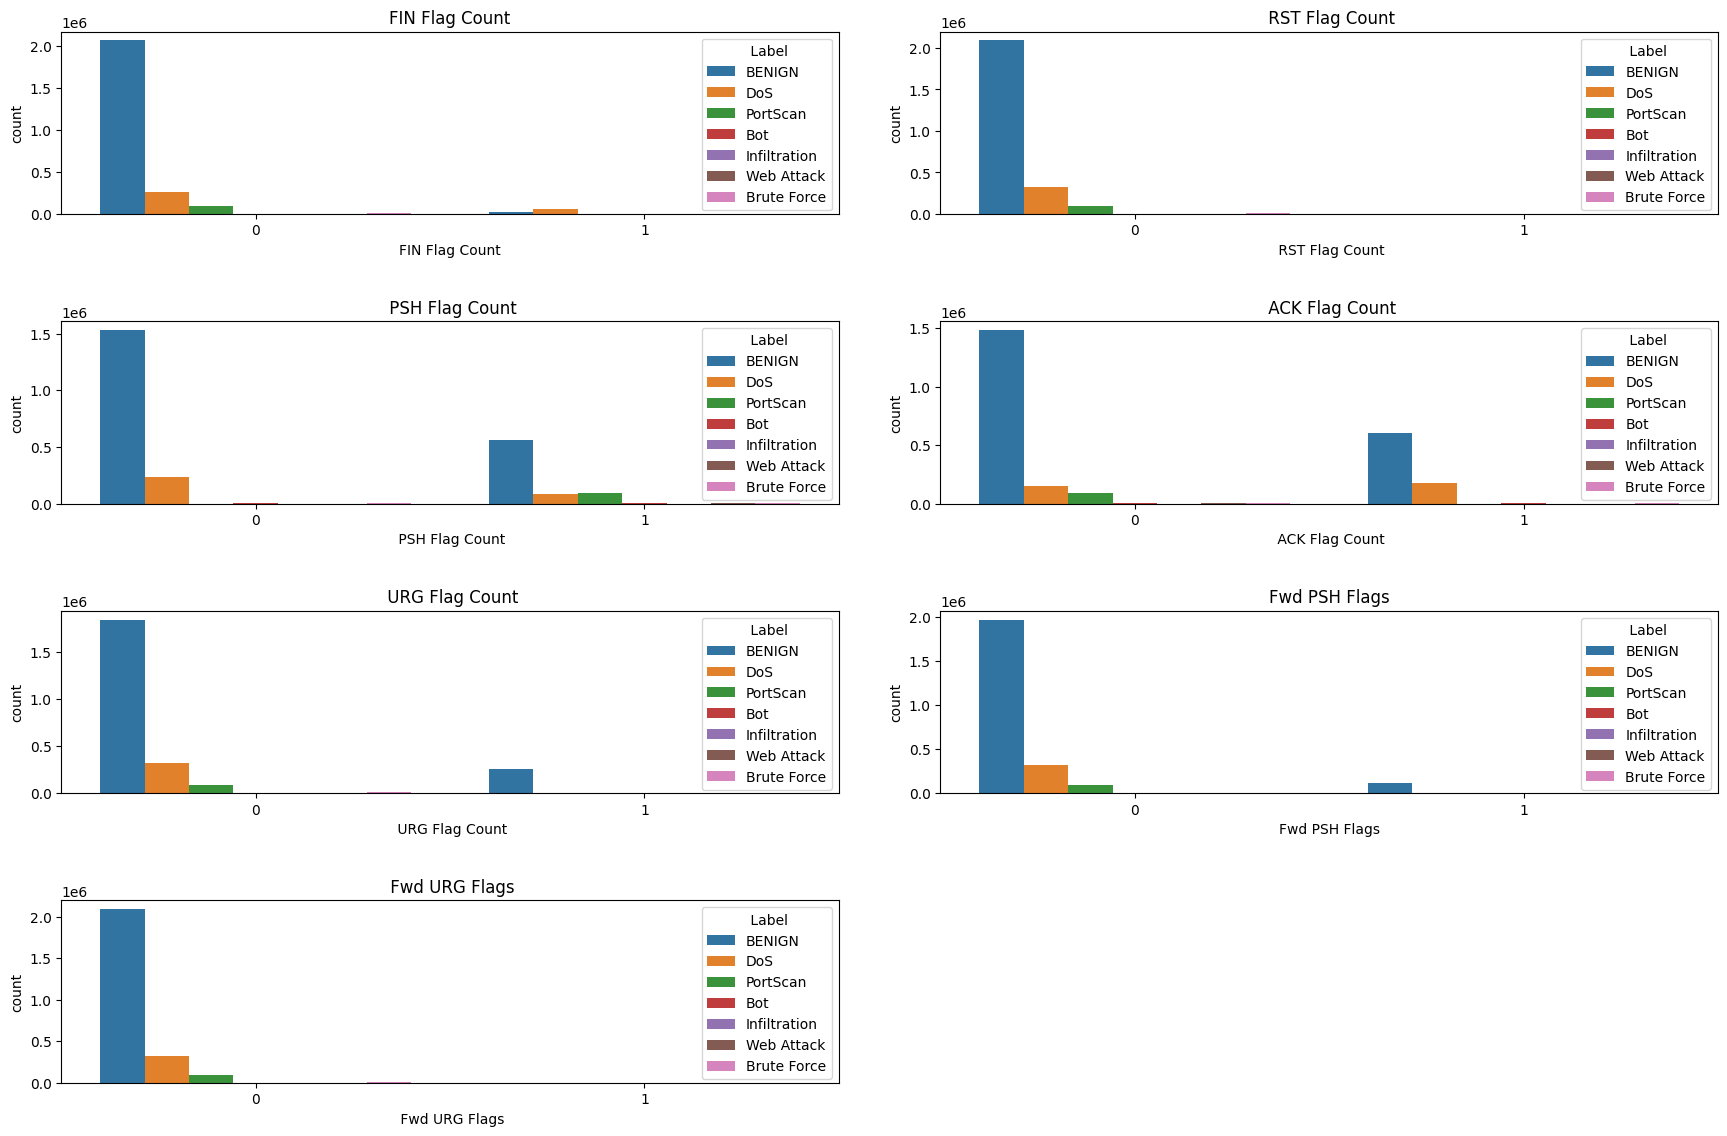

In [54]:
plt.figure(figsize=(18,12))
plt.subplot(4, 2, 1)
sns.countplot(data=data, x='FIN Flag Count', hue=' Label')
plt.title("FIN Flag Count")
plt.subplot(4, 2, 2)
sns.countplot(data=data, x=' RST Flag Count', hue=' Label')
plt.title(" RST Flag Count")
plt.subplot(4, 2, 3)
sns.countplot(data=data, x=' PSH Flag Count', hue=' Label')
plt.title(" PSH Flag Count")
plt.subplot(4, 2, 4)
sns.countplot(data=data, x=' ACK Flag Count', hue=' Label')
plt.title(" ACK Flag Count")
plt.subplot(4, 2, 5)
sns.countplot(data=data, x=' URG Flag Count', hue=' Label')
plt.title(" URG Flag Count")
plt.subplot(4, 2, 6)
sns.countplot(data=data, x='Fwd PSH Flags', hue=' Label')
plt.title("Fwd PSH Flags")
plt.subplot(4, 2, 7)
sns.countplot(data=data, x=' Fwd URG Flags', hue=' Label')
plt.title(" Fwd URG Flags")
plt.tight_layout(pad=3.0)
plt.show()

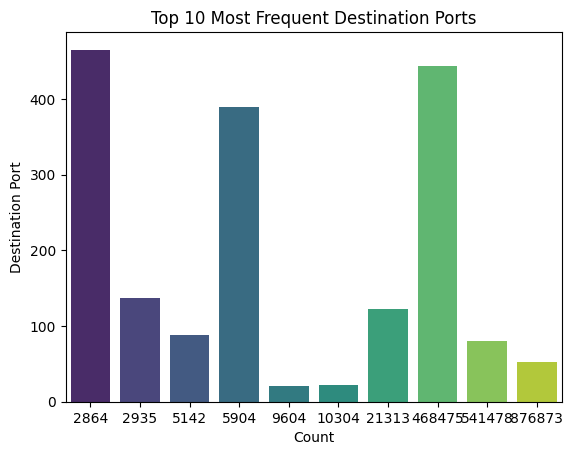

In [60]:
top_ports = (
    data[' Destination Port']
    .value_counts()
    .head(10)
)

sns.barplot(x=top_ports.values, y=top_ports.index, palette="viridis")
plt.title("Top 10 Most Frequent Destination Ports")
plt.xlabel("Count")
plt.ylabel("Destination Port")
plt.show()


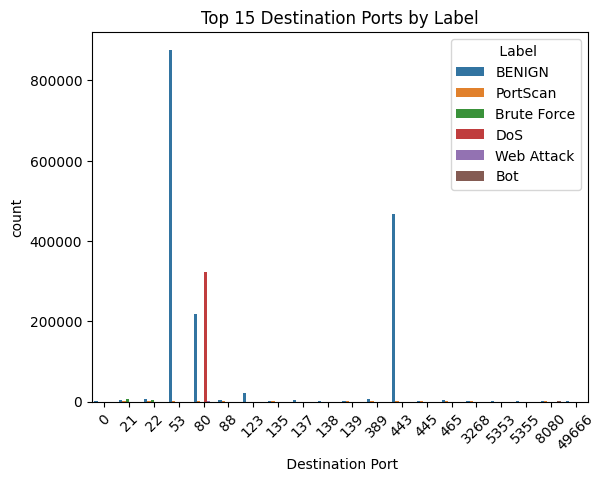

In [93]:
top_ports = data[' Destination Port'].value_counts().head(20).index
sns.countplot(
    data=data[data[' Destination Port'].isin(top_ports)],
    x=' Destination Port', hue=' Label'
)
plt.title("Top 15 Destination Ports by Label")
plt.xticks(rotation=45)
plt.show()

In [68]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)


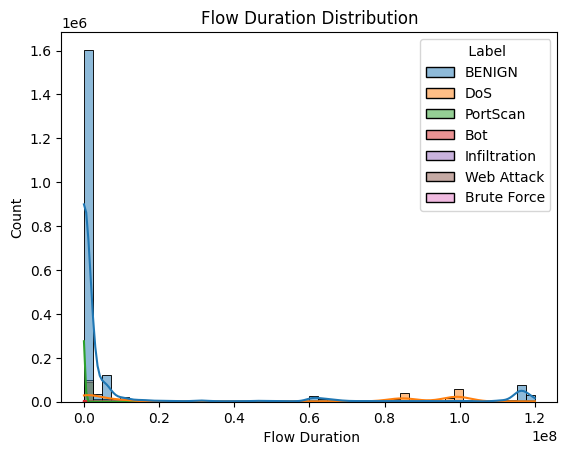

In [74]:
sns.histplot(data=data, x=' Flow Duration', bins=50, kde=True,hue=' Label')
plt.title("Flow Duration Distribution")
plt.show()

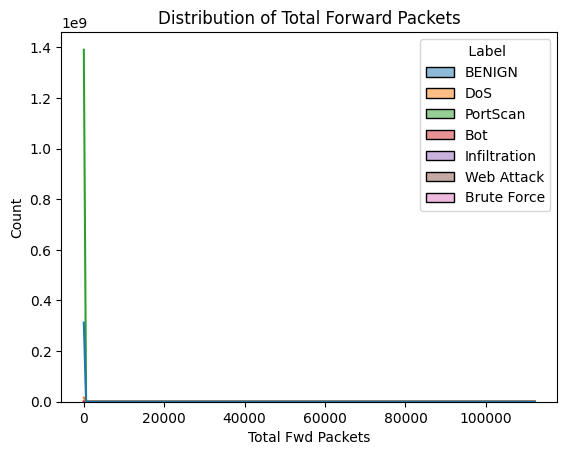

In [78]:
sns.histplot(data=data, x=' Total Fwd Packets', bins=50, kde=True,hue=' Label')
plt.title("Distribution of Total Forward Packets")
plt.xlabel("Total Fwd Packets")
plt.ylabel("Count")
plt.show()

In [80]:
data[' Total Fwd Packets'].value_counts()

Total Fwd Packets
2       857919
1       613479
3       201669
4       126090
5        87539
         ...  
1050         1
580          1
1657         1
585          1
1970         1
Name: count, Length: 1100, dtype: int64

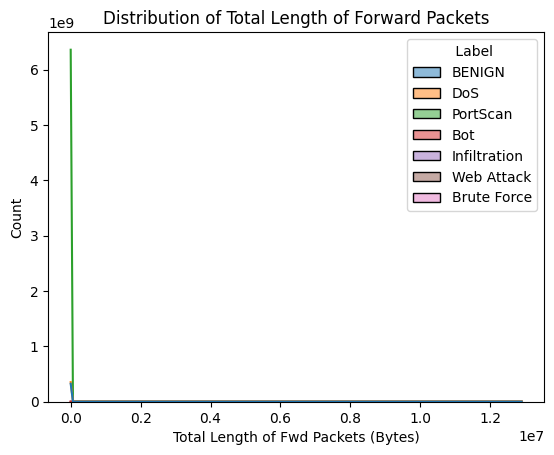

In [82]:
sns.histplot(data=data, x='Total Length of Fwd Packets', bins=50, kde=True,hue=' Label')
plt.title("Distribution of Total Length of Forward Packets")
plt.xlabel("Total Length of Fwd Packets (Bytes)")
plt.ylabel("Count")

plt.show()


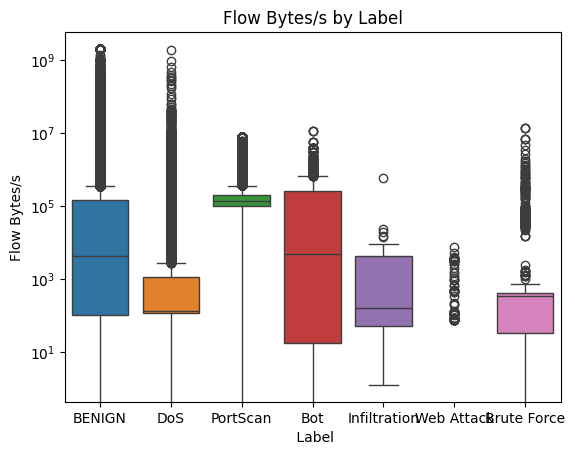

In [83]:
sns.boxplot(data=data, x=' Label', y='Flow Bytes/s',hue=' Label')
plt.yscale('log')
plt.title("Flow Bytes/s by Label")
plt.show()


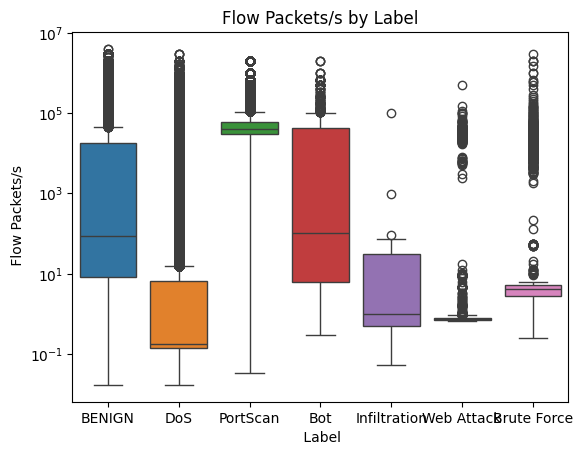

In [86]:
sns.boxplot(data=data, x=' Label', y=' Flow Packets/s',hue=' Label')
plt.yscale('log')
plt.title("Flow Packets/s by Label")
plt.show()


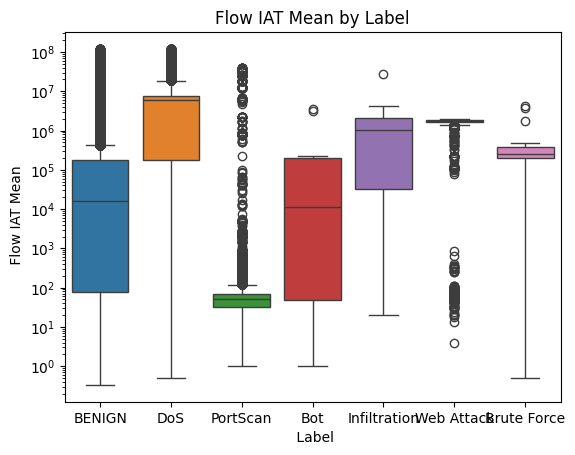

In [89]:
sns.boxplot(data=data, x=' Label', y=' Flow IAT Mean', hue=' Label')
plt.yscale('log')
plt.title("Flow IAT Mean by Label")
plt.show()


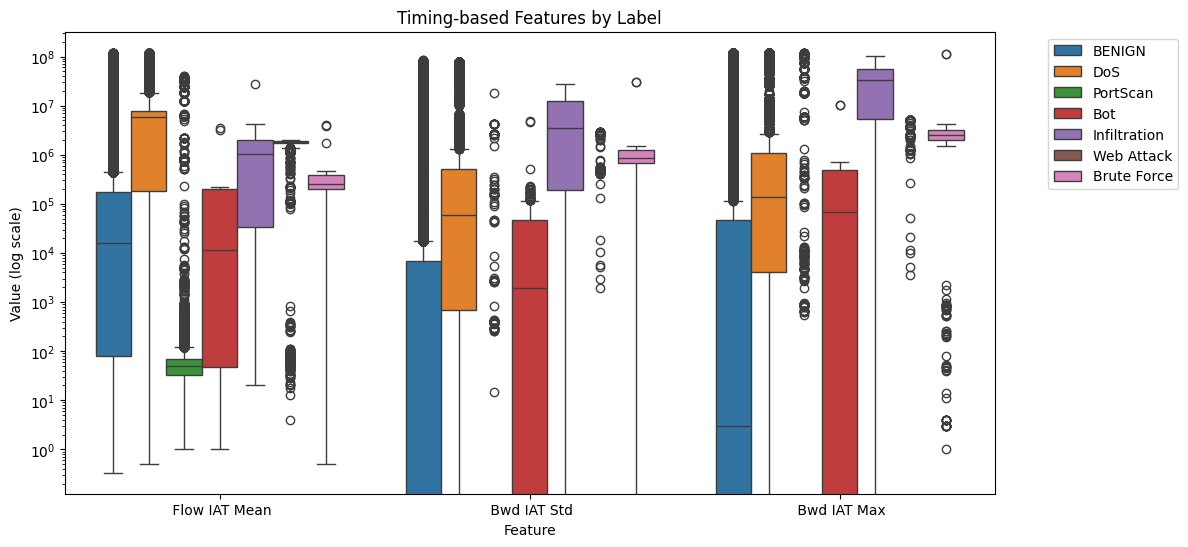

In [91]:
features = [' Flow IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max']
data_melt = data.melt(id_vars=' Label', value_vars=features)

plt.figure(figsize=(12,6))
sns.boxplot(data=data_melt, x='variable', y='value', hue=' Label')
plt.yscale('log')
plt.title("Timing-based Features by Label")
plt.xlabel("Feature")
plt.ylabel("Value (log scale)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [94]:
corr_data1=data.drop(columns=[' Label'])

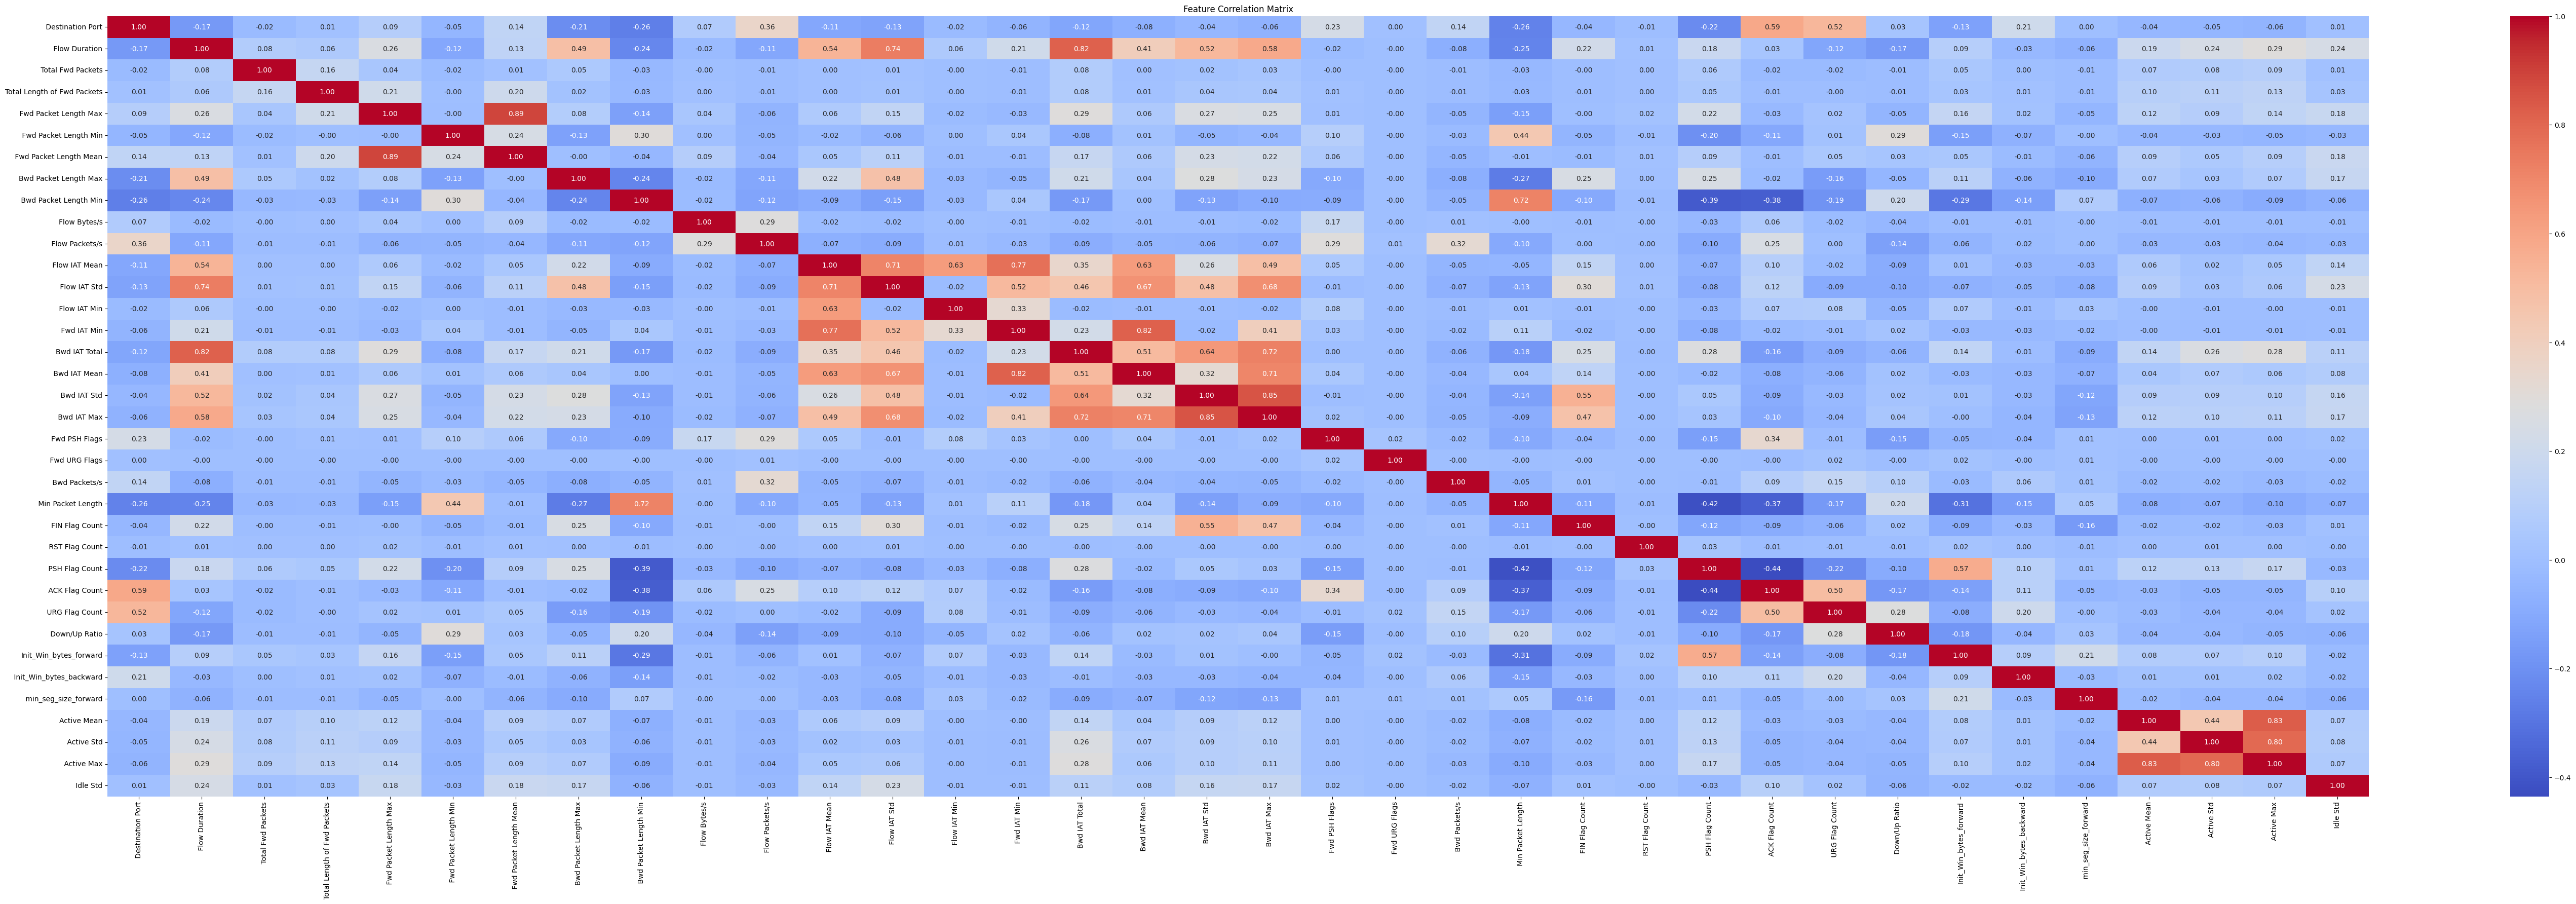

In [95]:
#features correlatio  # or whatever your target column name is
plt.figure(figsize=(72,20))
correlation_matrix =corr_data1.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()